# LAPD Crime Data, 2020-2022
***

In [58]:
# Imports:
# import json, requests
import pprint, os.path as path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import scipy.stats as st
import hvplot.pandas
import numpy as np

# Basic Data Input and Processing
***

In [59]:
# pull all data out of csv files
crime_data_2020 = pd.read_csv("Resources/crime_data_2020.csv")
crime_data_2021 = pd.read_csv("Resources/crime_data_2021.csv")
crime_data_2022 = pd.read_csv("Resources/crime_data_2022.csv")

# set datetime formatting to fields where it is necessary
for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    dat_fr["DATE OCC"] = pd.to_datetime(dat_fr["DATE OCC"])
    dat_fr["Date Rptd"] = pd.to_datetime(dat_fr["Date Rptd"])
    dat_fr['Year Crime Occured'] = dat_fr['DATE OCC'].dt.year

crime_data_2020.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occurred,Month Occurred,Year Crime Occured
0,0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,...,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,2020,1,2020
1,1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,...,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,2020,1,2020
2,2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,...,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,2020,2,2020
3,3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,...,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,2020,1,2020
4,4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,...,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,2020,1,2020


In [60]:
crime_data_full_yrs = pd.concat([crime_data_2020, crime_data_2021, crime_data_2022])

crime_data_full_yrs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 643205 entries, 0 to 234343
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          643205 non-null  int64         
 1   DR_NO               643205 non-null  int64         
 2   Date Rptd           643205 non-null  datetime64[ns]
 3   DATE OCC            643205 non-null  datetime64[ns]
 4   TIME OCC            643205 non-null  int64         
 5   AREA                643205 non-null  int64         
 6   AREA NAME           643205 non-null  object        
 7   Rpt Dist No         643205 non-null  int64         
 8   Part 1-2            643205 non-null  int64         
 9   Crm Cd              643205 non-null  int64         
 10  Crm Cd Desc         643205 non-null  object        
 11  Mocodes             554950 non-null  object        
 12  Vict Age            643205 non-null  int64         
 13  Vict Sex            559350 non-nul

# Exploratory Analysis
***
Summarization and Big Picture views to find out where to dig deeper

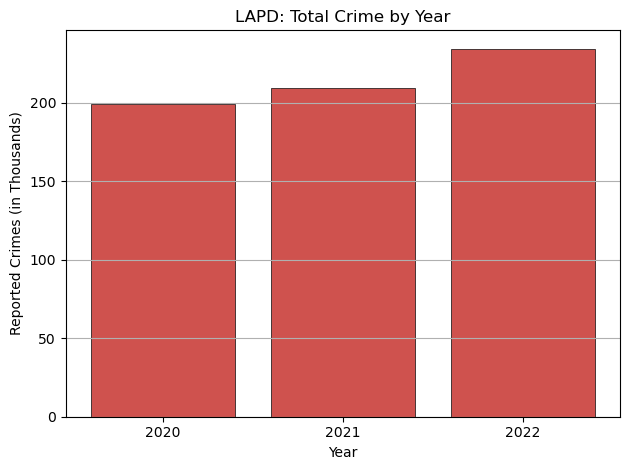

In [61]:
x = crime_data_full_yrs.groupby('Year Occurred',as_index=False).count()
y = x[['Year Occurred', 'DR_NO']].sort_values(by='Year Occurred') / 1000
bar_edgecolor = '#080808'

plt.bar(x['Year Occurred'], y['DR_NO'], edgecolor=bar_edgecolor, linewidth=0.5, color='xkcd:dark coral')
plt.title("LAPD: Total Crime by Year")
plt.xlabel("Year")
plt.ylabel("Reported Crimes (in Thousands)")
plt.xticks([2020, 2021, 2022])
plt.grid(axis='y')
plt.tight_layout()
plt.savefig(path.join('Output', 'Total Crime by Year'))
plt.show()

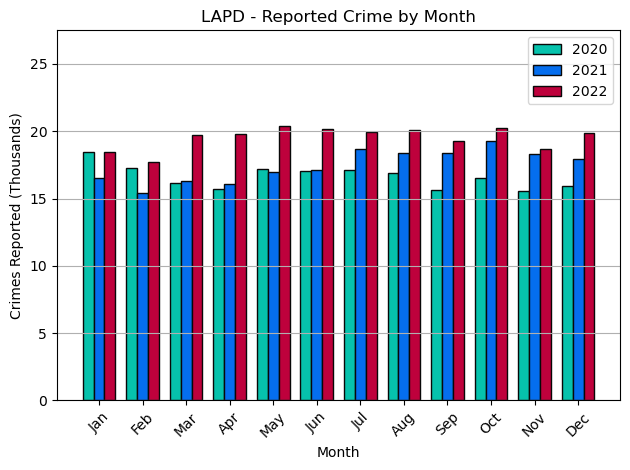

In [62]:
x_ax = crime_data_full_yrs['Month Occurred'].sort_values().unique()
yrs = crime_data_full_yrs['Year Occurred'].sort_values().unique()
y_vals = []
grouped_by_month = crime_data_full_yrs.groupby('Month Occurred', as_index=False).count()
months_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = ['xkcd:turquoise', 'xkcd:cerulean blue', 'xkcd:rose red']

for iter in range(len(yrs)):
    grouped_by_month = crime_data_full_yrs.loc[crime_data_full_yrs['Year Occurred'] == yrs[iter],['Month Occurred', 'DR_NO']].groupby('Month Occurred',as_index=False).count() / 1000
    y_vals = grouped_by_month.sort_values(by='Month Occurred')
    plt.bar(x_ax - 0.25 + (0.25 * iter), y_vals['DR_NO'], color=colors[iter], width=0.25, edgecolor=bar_edgecolor, linewidth=1)

plt.title("LAPD - Reported Crime by Month")
plt.xlabel("Month")
plt.ylabel("Crimes Reported (Thousands)")
plt.ylim(0,27.5)
plt.xticks(np.arange(1,13), labels=months_abbr, rotation=45)
plt.grid(axis='y')
plt.legend(yrs)
plt.tight_layout()
plt.savefig(path.join('Output', 'Total Crime by Month'))
plt.show()


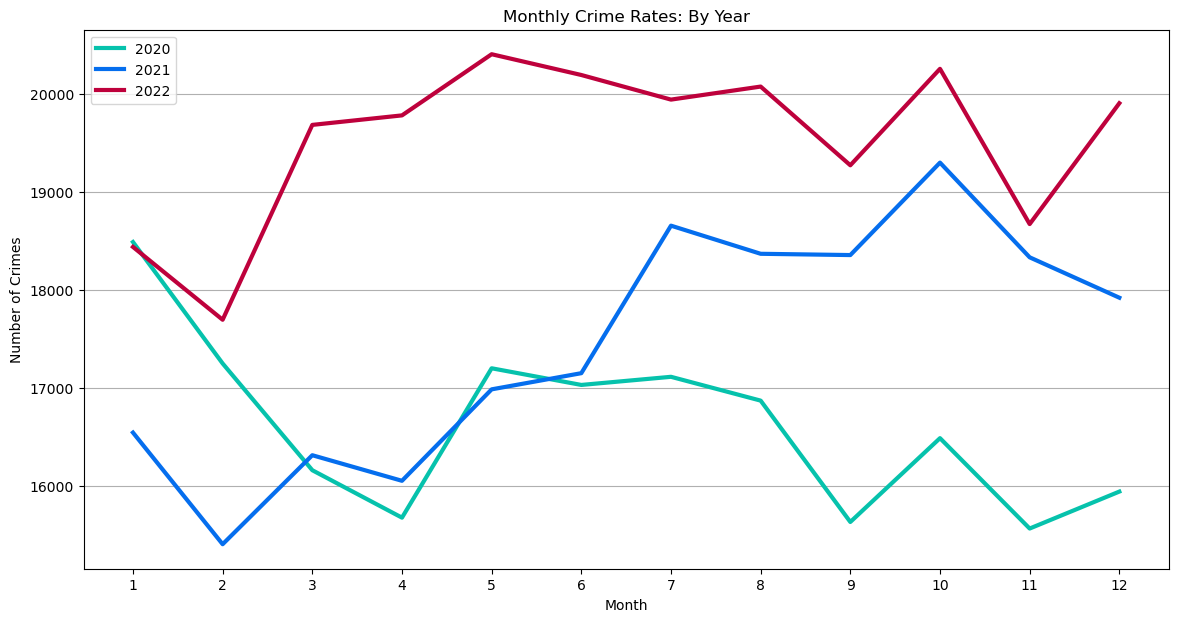

In [63]:
# alternate display monthly crime rates by year

a = crime_data_2020.groupby('Month Occurred',as_index=False).count()
b = a[['Month Occurred', 'DR_NO']].sort_values(by='Month Occurred')
c = crime_data_2021.groupby('Month Occurred',as_index=False).count()
d = c[['Month Occurred', 'DR_NO']].sort_values(by='Month Occurred')
e = crime_data_2022.groupby('Month Occurred',as_index=False).count()
f = e[['Month Occurred', 'DR_NO']].sort_values(by='Month Occurred')

plt.figure(figsize = (14,7))
width = 0.25
bar1=plt.plot(a['Month Occurred'], b['DR_NO'],  color='xkcd:turquoise', label='2020', linewidth=3)
bar2=plt.plot(c['Month Occurred'], d['DR_NO'], color='xkcd:cerulean blue', label='2021', linewidth=3)
bar3 =plt.plot(e['Month Occurred'], f['DR_NO'],  color='xkcd:rose red', label='2022', linewidth=3)
plt.title("Monthly Crime Rates: By Year")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend()
plt.grid(axis='y')
plt.show()

In [64]:
crime_by_area = crime_data_full_yrs.groupby('AREA NAME', as_index=False)
crime_by_area = crime_by_area['AREA NAME'].value_counts().sort_values('count', ascending=False)
crime_by_area.head()

,AREA NAME,count
1,Central,42413
0,77th Street,40907
12,Pacific,37482
15,Southwest,35906
6,Hollywood,34736


In [65]:
most_committed_crime_2022 = crime_data_2022.groupby(['Crm Cd Desc'], as_index=False)['Crm Cd Desc'].value_counts().sort_values('count', ascending=False)
most_committed_crime_2022.head(10)

,Crm Cd Desc,count
128,VEHICLE - STOLEN,24724
113,THEFT OF IDENTITY,21787
4,BATTERY - SIMPLE ASSAULT,18053
20,BURGLARY FROM VEHICLE,14221
19,BURGLARY,14054
125,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",13343
2,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",12860
115,THEFT PLAIN - PETTY ($950 & UNDER),11353
71,INTIMATE PARTNER - SIMPLE ASSAULT,11157
110,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,10074


## Exploratory: Most Increasing and Decreasing Crimes Year-over-year
***

In [66]:
# create series for each year with crime code totals only
crime_by_cd_2020 = crime_data_2020.groupby('Crm Cd Desc')['Crm Cd Desc'].count().sort_index().rename('2020')
crime_by_cd_2021 = crime_data_2021.groupby('Crm Cd Desc')['Crm Cd Desc'].count().sort_index().rename('2021')
crime_by_cd_2022 = crime_data_2022.groupby('Crm Cd Desc')['Crm Cd Desc'].count().sort_index().rename('2022')

crime_by_cd_2020.head(3)
crime_by_cd_2020.count()

129

In [67]:
# merge all data into one dataframe using an inner join
crime_by_cd = pd.merge(crime_by_cd_2020, crime_by_cd_2021, how='inner', on='Crm Cd Desc')
crime_by_cd = pd.merge(crime_by_cd, crime_by_cd_2022, how='inner', on='Crm Cd Desc')

# drop all crime codes where 2020 had were less than 500 incidents. Arbitrary, but makes percent changes more meaningful
crime_by_cd = crime_by_cd.loc[crime_by_cd['2020'] >= 500,:]

crime_by_cd.count()

2020    41
2021    41
2022    41
dtype: int64

In [68]:
# Calculate percent change between 2020-2021, and 2021-2022

change_by_cd_20_21 = (((crime_by_cd['2021'] - crime_by_cd['2020']) / crime_by_cd['2020']) * 100).sort_values(ascending=False)
change_by_cd_21_22 = (((crime_by_cd['2022'] - crime_by_cd['2021']) / crime_by_cd['2022']) * 100).sort_values(ascending=False)

print('2020-2021')
print(change_by_cd_20_21.head(4))
print(change_by_cd_20_21.tail(4))

print('\n2021-2022 percent changes')
print(change_by_cd_21_22.head(4))
print(change_by_cd_21_22.tail(4))

2020-2021
Crm Cd Desc
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         57.202593
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                     30.518234
THEFT OF IDENTITY                                           26.557526
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    22.292763
dtype: float64
Crm Cd Desc
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)   -16.417910
SHOPLIFTING - PETTY THEFT ($950 & UNDER)     -17.169439
CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT      -19.109027
BUNCO, PETTY THEFT                           -21.099291
dtype: float64

2021-2022 percent changes
Crm Cd Desc
THEFT OF IDENTITY                                      48.905311
SHOPLIFTING-GRAND THEFT ($950.01 & OVER)               48.740861
SHOPLIFTING - PETTY THEFT ($950 & UNDER)               44.826291
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)    25.362319
dtype: float64
Crm Cd Desc
DISCHARGE FIREARMS/SHOTS FIRED             -12.438625
ARSON                                      -18.07909

In [69]:
# see top 3 increasing crimes from 2020 to 2021
list(change_by_cd_20_21.head(3).index)

['THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
 'THEFT OF IDENTITY']

In [70]:
ext_num = 3

# grab highest growing crimes for both 2020-2021 and 2021-2022
# and lowest declining crimes for both 2020-2021 and 2021-2022
# looking at top 3, removing duplicates
top_growing_crimes = list(change_by_cd_20_21.head(ext_num).index) + list(set(list(change_by_cd_21_22.head(ext_num).index)) - set(list(change_by_cd_20_21.head(ext_num).index)))
lowest_decl_crimes = list(change_by_cd_20_21.tail(ext_num).index) + list(set(list(change_by_cd_21_22.tail(ext_num).index)) - set(list(change_by_cd_20_21.tail(ext_num).index)))

print('Top Growing Crimes', top_growing_crimes)
print('Bottom Decl. Crimes', lowest_decl_crimes)

Top Growing Crimes ['THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'THEFT OF IDENTITY', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)']
Bottom Decl. Crimes ['SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'BUNCO, PETTY THEFT', 'BIKE - STOLEN', 'ARSON', 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)']


In [71]:
# combine highest increasing and lowest decreasing crimes out of change by code series'
# and converts to DataFrame
top_crime_change = pd.merge(change_by_cd_20_21.loc[change_by_cd_20_21.index.isin(top_growing_crimes)].rename('20-21'),
                            change_by_cd_21_22.loc[change_by_cd_21_22.index.isin(top_growing_crimes)].rename('21-22'),
                            how='outer',
                            on='Crm Cd Desc').swapaxes('index', 'columns')
bot_crime_change = pd.merge(change_by_cd_20_21.loc[change_by_cd_20_21.index.isin(lowest_decl_crimes)].rename('20-21'),
                            change_by_cd_21_22.loc[change_by_cd_21_22.index.isin(lowest_decl_crimes)].rename('21-22'),
                            how='outer',
                            on='Crm Cd Desc').swapaxes('index', 'columns')
top_crime_change

Crm Cd Desc,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),"LETTERS, LEWD - TELEPHONE CALLS, LEWD",THEFT OF IDENTITY,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),SHOPLIFTING - PETTY THEFT ($950 & UNDER)
20-21,57.202593,30.518234,26.557526,21.814672,-17.169439
21-22,25.362319,-6.250000,48.905311,48.740861,44.826291


In [72]:
bot_crime_change

Crm Cd Desc,BIKE - STOLEN,ARSON,VANDALISM - MISDEAMEANOR ($399 OR UNDER),SHOPLIFTING - PETTY THEFT ($950 & UNDER),CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,"BUNCO, PETTY THEFT"
20-21,5.031754,-5.714286,-9.597479,-17.169439,-19.109027,-21.099291
21-22,-18.261826,-18.079096,-24.110128,44.826291,20.415225,-5.450237


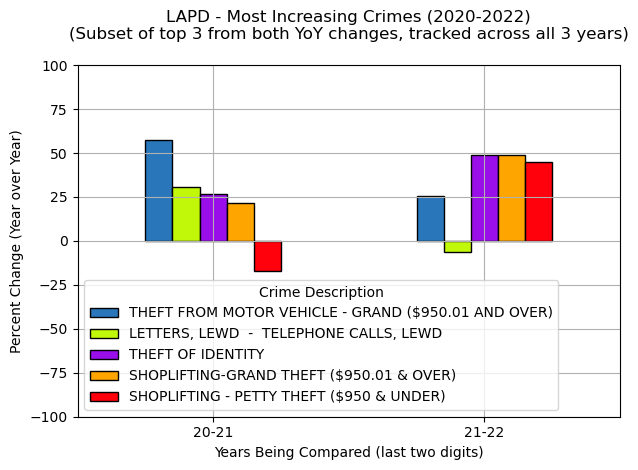

In [73]:
top_crime_change.plot(ylim=(-100, 100), grid=True, kind='bar', 
                    xlabel='Years Being Compared (last two digits)', 
                    ylabel='Percent Change (Year over Year)',
                    title='LAPD - Most Increasing Crimes (2020-2022)\n(Subset of top 3 from both YoY changes, tracked across all 3 years)\n',
                    edgecolor='k', 
                    linewidth=1,
                    color=['xkcd:bluish', 'xkcd:chartreuse', 'xkcd:violet', 'orange', 'xkcd:bright red'])

plt.xticks(rotation=0)
plt.legend(title='Crime Description')
plt.tight_layout()
plt.savefig(path.join('Output', 'Most Increasing Crimes 2020-2022'))
plt.show()

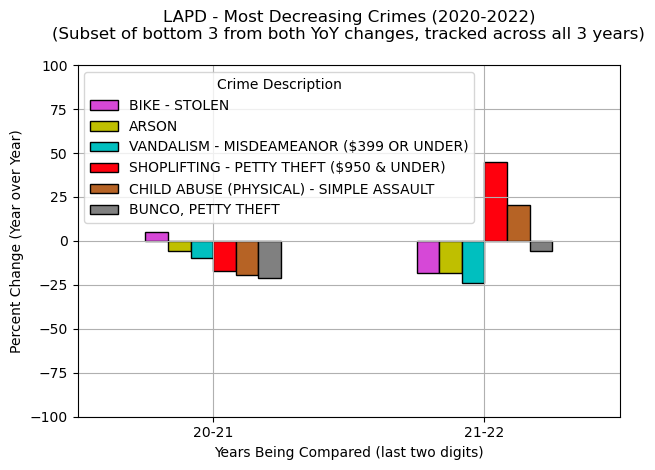

In [74]:
bot_crime_change.plot(ylim=(-100, 100), grid=True, kind='bar', 
                    xlabel='Years Being Compared (last two digits)', 
                    ylabel='Percent Change (Year over Year)',
                    title='LAPD - Most Decreasing Crimes (2020-2022)\n(Subset of bottom 3 from both YoY changes, tracked across all 3 years)\n',
                    color=['xkcd:pinkish purple', 'y', 'c', 'xkcd:bright red', 'xkcd:copper', 'gray'],
                    edgecolor='k', 
                    linewidth=1)

plt.xticks(rotation=0)
plt.legend(title='Crime Description')
plt.tight_layout()
plt.savefig(path.join('Output', 'Most Decreasing Crimes 2020-2022'))
plt.show()

## Exploratory: Miscellaneous
***
These figures and plots did not make it into the final project

In [9]:
# remove all invalid lat/longs
crime_with_loc = crime_data_full_yrs.loc[crime_data_full_yrs["LAT"] != 0,:]

In [10]:
map_plot_1 = crime_with_loc.sample(5000).hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=600,
                                    frame_height=500,
                                    color='AREA NAME'
                                    )
map_plot_1

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (AREA NAME)

In [15]:
# Creatie a dictionary for crime descriptions and their corresponding code
crm_types = crime_data_full_yrs['Crm Cd Desc'].unique()
crm_types

crm_cd_dict = {}

for type_of_crm in crm_types:
    crm_cd_dict[type_of_crm] = crime_data_full_yrs.loc[crime_data_full_yrs['Crm Cd Desc'] == type_of_crm,['Crm Cd']]['Crm Cd'].unique()[0]

In [16]:
# create series from crime code dictionary
crm_cd_series = pd.Series(crm_cd_dict).sort_values(ascending=True)

crm_cd_series.to_csv(path.join('Resources', 'Crime Code Lookup.csv'))

crm_cd_series.head()

CRIMINAL HOMICIDE          110
MANSLAUGHTER, NEGLIGENT    113
RAPE, FORCIBLE             121
RAPE, ATTEMPTED            122
ROBBERY                    210
dtype: int64

In [17]:
# create DF that drops all crimes without mocodes
crimes_with_mocodes = crime_data_full_yrs[crime_data_full_yrs["Mocodes"].notna()]

# grab all crimes with mocode '9999', which is 'Indistinctive MO' which we were curious about looking at
# Also drop crimes without a valid location so we can map them
crimes_unknown_mo = crimes_with_mocodes.loc[(crimes_with_mocodes["Mocodes"].str.contains("9999")) & (crimes_with_mocodes["LAT"]!=0),['DATE OCC', 'Crm Cd', 'Crm Cd Desc', 'Mocodes', 'Status Desc', 'LAT', 'LON', 'AREA NAME']]

In [18]:
map_plot_3 = crimes_unknown_mo.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=600,
                                    frame_height=500,
                                    color='AREA NAME'
                                    )
map_plot_3

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (AREA NAME)

In [19]:
# grab homicide crimes according to crime code (attempted and successful)
homicide_codes=[110]
homicide_crimes = crime_data_full_yrs.loc[crime_data_full_yrs["Crm Cd"].isin(homicide_codes),:]
homicide_crimes.head()

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Year Occurred,Month Occurred,Year Crime Occured
3204,3204,200218817,2020-12-20,2020-12-20,1308,2,Rampart,295,1,110,...,998.0,NaN,NaN,1200 VENICE BL,NaN,34.0424,-118.2810,2020,12,2020
3231,3231,200416099,2020-12-19,2020-12-19,1719,4,Hollenbeck,464,1,110,...,NaN,NaN,NaN,200 S SOTO ST,NaN,34.0445,-118.2116,2020,12,2020
4612,4612,200504437,2020-01-10,2020-01-10,330,5,Harbor,567,1,110,...,NaN,NaN,NaN,800 S BEACON ST,NaN,33.7369,-118.2804,2020,1,2020
6112,6112,200410989,2020-07-20,2020-07-20,2230,4,Hollenbeck,499,1,110,...,998.0,NaN,NaN,BESWICK,CALZONA ST,34.0205,-118.1957,2020,7,2020
9278,9278,201113525,2020-09-12,2020-09-12,1200,11,Northeast,1137,1,110,...,998.0,NaN,NaN,600 N AVENUE 50,NaN,34.1109,-118.2016,2020,9,2020


In [20]:
homicide_crimes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 3204 to 234269
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          1142 non-null   int64         
 1   DR_NO               1142 non-null   int64         
 2   Date Rptd           1142 non-null   datetime64[ns]
 3   DATE OCC            1142 non-null   datetime64[ns]
 4   TIME OCC            1142 non-null   int64         
 5   AREA                1142 non-null   int64         
 6   AREA NAME           1142 non-null   object        
 7   Rpt Dist No         1142 non-null   int64         
 8   Part 1-2            1142 non-null   int64         
 9   Crm Cd              1142 non-null   int64         
 10  Crm Cd Desc         1142 non-null   object        
 11  Mocodes             1132 non-null   object        
 12  Vict Age            1142 non-null   int64         
 13  Vict Sex            1142 non-null   object      

In [21]:
hom_sample = homicide_crimes.loc[homicide_crimes['LAT'] != 0,['Crm Cd', 'LAT', 'LON']]
map_plot_hom = hom_sample.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="CartoLight",
                                    frame_width=700,
                                    frame_height=500,
                                    # color="Crm Cd"
)

map_plot_hom

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]

In [22]:
robbery_codes=[210,220]
robberies_w_mocodes_df = crimes_with_mocodes.loc[(crimes_with_mocodes["Crm Cd"].isin(robbery_codes)),['Crm Cd', 'LAT', 'LON', 'Mocodes']]
gun_robberies = robberies_w_mocodes_df.loc[robberies_w_mocodes_df["Mocodes"].str.contains("0302"),:]
gun_robberies.head()


,Crm Cd,LAT,LON,Mocodes
87,210,34.0467,-118.2485,2004 0913 0344 0334 0302 1402 1202
120,210,34.0433,-118.2377,0305 1309 0355 0334 0302 0344 1822
135,210,34.0215,-118.3393,1822 0342 1100 0334 0302 0430 1300 1309 1407 1409
472,210,34.0377,-118.2607,0344 0334 1311 1302 1822 1218 0302 1309 2024 0916
747,210,34.0389,-118.2643,0340 0334 0302 0355 0344 0377 1822


In [23]:
map_plot_robberies = gun_robberies.hvplot.points(
                                    "LON",
                                    "LAT",
                                    geo=True,
                                    tiles="EsriImagery",
                                    frame_width=700,
                                    frame_height=500,
                                    color="Crm Cd"
                                    )
map_plot_robberies

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [LON,LAT]   (Crm Cd)

# Identity Theft
***
Summarizations using the crime data provided

In [12]:
id_theft_2022 = crime_data_2022.loc[crime_data_2022["Crm Cd"] == 354,:]

id_theft_2022['Crm Cd Desc'].value_counts()

Crm Cd Desc
THEFT OF IDENTITY    21787
Name: count, dtype: int64

# ID Theft Monthly rates over time
***

In [13]:
id_theft_by_month = []
year = 2020

for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    for i in range(1,13):
        id_theft_by_month.append([len(dat_fr.loc[(dat_fr["Crm Cd"] == 354) & (dat_fr["Month Occurred"] == i),:])])
    year += 1

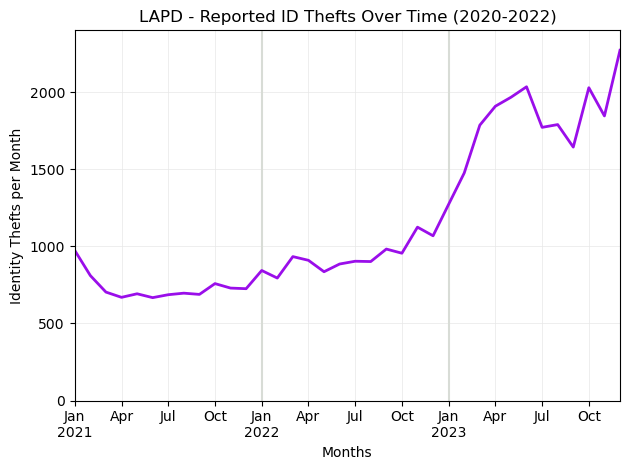

In [14]:
fig, ax = plt.subplots()
x_ax = range(1,37)
# plotting vlines first so they don't go over line
plt.vlines((13, 25), 0, 2400, linestyles='solid', colors=['xkcd:light grey'])
plt.plot(x_ax, id_theft_by_month, color='xkcd:violet', linewidth=2)
plt.title("LAPD - Reported ID Thefts Over Time (2020-2022)")
plt.xlim(1, 36)
plt.ylim(0, 2400)

# for loop to fill out tick markers
mo_ticks = np.arange(1,37,3)
mo_labels = []
cur_year = 2020
for tick in mo_ticks:
    t_mod = tick % 12
    if t_mod == 1:
        cur_year += 1
        mo_labels.append(f'Jan\n{cur_year}')
    elif t_mod == 4:
        mo_labels.append(f'Apr')
    elif t_mod == 7:
        mo_labels.append(f'Jul')
    elif t_mod == 10:
        mo_labels.append(f'Oct')  

plt.xticks(ticks=mo_ticks, labels=mo_labels)

# ax.set_xticks(np.arange(1, 37, 12), minor=False)
# ax.set_xticks(np.arange(1, 37, 3), minor=True)

ax.grid(which='major', color = '#E8E8E8', linewidth = 0.5)
ax.xaxis.grid(True, which='both')



plt.grid(axis='y', color='#E8E8E8')
plt.xlabel("Months")
plt.ylabel("Identity Thefts per Month")
plt.tight_layout()
plt.savefig(path.join('Output', 'ID Theft Over Time 2020-2022'))
plt.show()

In [48]:
id_theft_by_month_m = []
id_theft_by_month_f = []

for dat_fr in [crime_data_2020, crime_data_2021, crime_data_2022]:
    for i in range(1,13):
        id_theft_by_month_f.append([len(dat_fr.loc[(dat_fr["Crm Cd"] == 354) & (dat_fr["Month Occurred"] == i) & (dat_fr["Vict Sex"] == 'F'),:])])
        id_theft_by_month_m.append([len(dat_fr.loc[(dat_fr["Crm Cd"] == 354) & (dat_fr["Month Occurred"] == i) & (dat_fr["Vict Sex"] == 'M'),:])])

## ID Theft Over Time - By Sex

In [24]:
# Get Victim Sex breakdown in the data
crime_data_full_yrs["Vict Sex"].value_counts()

Vict Sex
M    268249
F    238520
X     52506
H        75
Name: count, dtype: int64

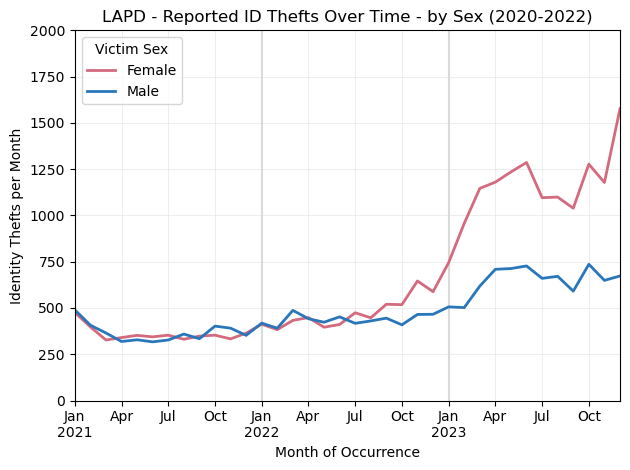

In [49]:
fig, ax = plt.subplots()
colors = ['xkcd:pinkish', 'xkcd:bluish']

plt.vlines((13, 25), 0, 2400, linestyles='solid', colors=['xkcd:light grey'])
plt.plot(x_ax, id_theft_by_month_f, color=colors[0], linewidth=2, label='Female')
plt.plot(x_ax, id_theft_by_month_m, color=colors[1], linewidth=2, label='Male')
plt.title("LAPD - Reported ID Thefts Over Time - by Sex (2020-2022)")
plt.xlim(1, 36)
plt.ylim(0, 2000)
plt.xticks(ticks=mo_ticks, labels=mo_labels)
ax.grid(which='major', color = '#E8E8E8', linewidth = 0.5)
ax.xaxis.grid(True, which='both')


plt.grid(axis='y', color='#E8E8E8')
plt.xlabel("Month of Occurrence")
plt.ylabel("Identity Thefts per Month")
plt.legend(loc='upper left', title='Victim Sex')
plt.tight_layout()
plt.savefig(path.join('Output', 'ID Theft Over Time by Sex 2020-2022'))
plt.show()

In [54]:
# get percent change from 2021 to 2022, by total, male, and female
id_theft_total_21_22 = ( sum(id_theft_by_month[24:][0]) - sum(id_theft_by_month[12:24][0])) / sum(id_theft_by_month[12:24][0]) * 100
id_theft_m_21_22 = ( sum(id_theft_by_month_m[24:][0]) - sum(id_theft_by_month_m[12:24][0])) / sum(id_theft_by_month_m[12:24][0]) * 100
id_theft_f_21_22 = ( sum(id_theft_by_month_f[24:][0]) - sum(id_theft_by_month_f[12:24][0])) / sum(id_theft_by_month_f[12:24][0]) * 100

print(f'Total % change from 2021-2022: {id_theft_total_21_22:.2f}%\nMale Victim % change from 2021-2022: {id_theft_m_21_22:.2f}%\nFemale Victim % change from 2021-2022: {id_theft_f_21_22:.2f}%')

Total % change from 2021-2022: 50.89%
Male Victim % change from 2021-2022: 21.05%
Female Victim % change from 2021-2022: 80.83%


In [25]:
# Get Victim Age breakdown in the data
crime_data_full_yrs["Vict Age"].value_counts()

Vict Age
 0      154675
 30      14866
 35      14451
 29      14147
 31      14088
         ...  
 98         51
 97         46
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

In [26]:
print("Average Victim Age:", crime_data_full_yrs["Vict Age"].mean())

Average Victim Age: 30.04714826532754


In [27]:
zero_age = crime_data_full_yrs.loc[crime_data_full_yrs["Vict Age"] == 0,:]
zero_age['Vict Age'].count()

154675

### Due to some reports containing a zero age, we have a few options to consider for the data.

- Because of the sizable amount, we can replace all 0 values to a random range within the mean (30) like 28-32.
- The option to outright discard the data is there, but losing 154,675 data points along with crimes such as vehicular theft and burglary, it is a very big choice.
- We can always just leave it at 0 and determine why it was reported as age 0. Possibly because there were multiple victims in the scene.

In [28]:
#pulling only ID Theft 2020
ID_theft_2020 = crime_data_2020.loc[crime_data_2020["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft_2020['Vict Age'].max()
min_age= ID_theft_2020['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft_2020.loc[ID_theft_2020["Vict Age"] < 1,:]
print(len(age_zero))
#just want ages >1
ID_theft_2020 = ID_theft_2020.loc[ID_theft_2020["Vict Age"] >1,:]

max age: 99
min age: -2
162


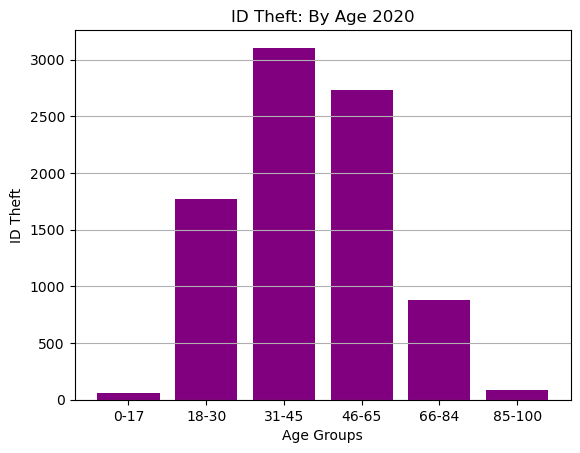

In [29]:
bins = [0, 17.9, 29.9, 44.9, 64.9, 83.9, 99.9]
labels = ["0-17", "18-30", "31-45", "46-65", "66-84", "85-100"]
ID_theft_2020['ID Theft Victim Age'] = pd.cut(ID_theft_2020['Vict Age'],bins, labels=labels,include_lowest=True)
x = ID_theft_2020.groupby('ID Theft Victim Age',as_index=False).count()
y = x[['ID Theft Victim Age', 'Vict Age']].sort_values(by='ID Theft Victim Age')

plt.bar(x['ID Theft Victim Age'], y['Vict Age'], color='purple')
plt.title("ID Theft: By Age 2020")
plt.xlabel("Age Groups")
plt.ylabel("ID Theft")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()

In [33]:
#pulling only ID Theft 2021
ID_theft_2021 = crime_data_2021.loc[crime_data_2021["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft_2021['Vict Age'].max()
min_age= ID_theft_2021['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft_2021.loc[ID_theft_2021["Vict Age"] < 1,:]
print(len(age_zero))
#just want ages >1
ID_theft_2021 = ID_theft_2021.loc[ID_theft_2021["Vict Age"] >1,:]

max age: 99
min age: -1
293


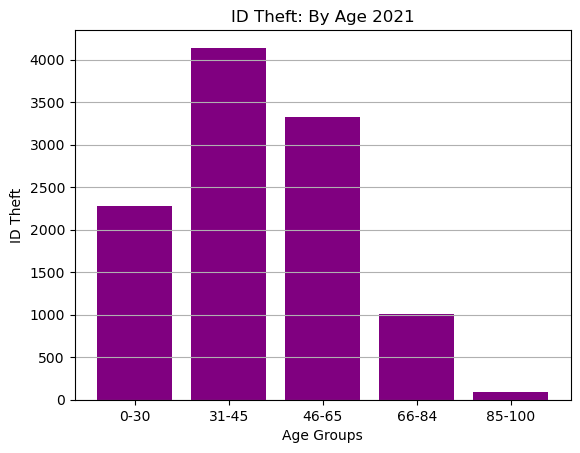

In [34]:
bins = [0, 29.9, 44.9, 64.9, 83.9, 99.9]
labels = ["0-30", "31-45", "46-65", "66-84", "85-100"]
ID_theft_2021['ID Theft Victim Age'] = pd.cut(ID_theft_2021['Vict Age'],bins, labels=labels,include_lowest=True)
x = ID_theft_2021.groupby('ID Theft Victim Age',as_index=False).count()
y = x[['ID Theft Victim Age', 'Vict Age']].sort_values(by='ID Theft Victim Age')

plt.bar(x['ID Theft Victim Age'], y['Vict Age'], color='purple')
plt.title("ID Theft: By Age 2021")
plt.xlabel("Age Groups")
plt.ylabel("ID Theft")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()

In [35]:
#pulling only ID Theft 2022
ID_theft_2022 = crime_data_2022.loc[crime_data_2022["Crm Cd Desc"] == 'THEFT OF IDENTITY',:]
#seeing max and min age in data set
max_age = ID_theft_2022['Vict Age'].max()
min_age= ID_theft_2022['Vict Age'].min()
print(f"max age: {max_age}")
print(f"min age: {min_age}")
#seeing how many rows are age -1 to 0
age_zero = ID_theft_2022.loc[ID_theft_2022["Vict Age"] < 1,:]
print("ID thefts with zero age:",len(age_zero))
#just want ages >1
ID_theft_2022 = ID_theft_2022.loc[ID_theft_2022["Vict Age"] >1,:]

max age: 99
min age: -1
ID thefts with zero age: 272


In [36]:
bins = [0, 29.9, 44.9, 64.9, 83.9, 99.9]
labels = ["0-30", "31-45", "46-65", "66-84", "85-100"]
ID_theft_2022['ID Theft Victim Age'] = pd.cut(ID_theft_2022['Vict Age'], bins, labels=labels,include_lowest=True)
ID_theft_2022[["Crm Cd Desc",'Vict Age','ID Theft Victim Age']].head()

,Crm Cd Desc,Vict Age,ID Theft Victim Age
9,THEFT OF IDENTITY,29,0-30
22,THEFT OF IDENTITY,31,31-45
35,THEFT OF IDENTITY,33,31-45
39,THEFT OF IDENTITY,27,0-30
42,THEFT OF IDENTITY,38,31-45


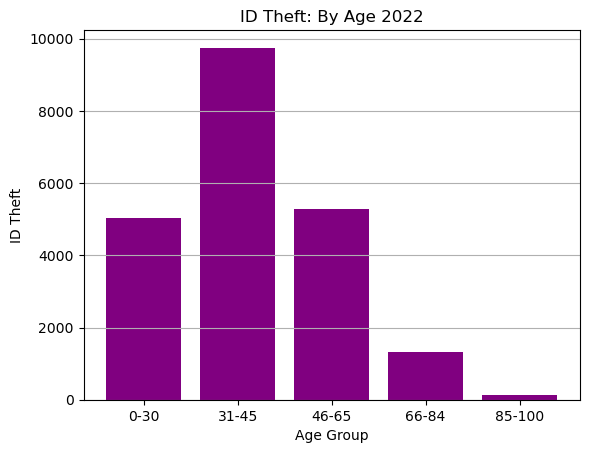

In [37]:
x = ID_theft_2022.groupby('ID Theft Victim Age',as_index=False).count()
y = x[['ID Theft Victim Age', 'Vict Age']].sort_values(by='ID Theft Victim Age')

plt.bar(x['ID Theft Victim Age'], y['Vict Age'], color='purple')
plt.title("ID Theft: By Age 2022")
plt.xlabel("Age Group")
plt.ylabel("ID Theft")
plt.xticks(labels)
plt.grid(axis='y')
plt.show()

43.48112114894603
41.0
ModeResult(mode=32, count=257)


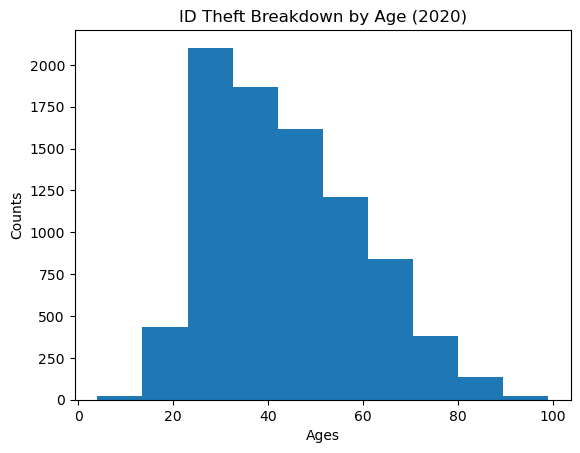

NormaltestResult(statistic=435.9814796796567, pvalue=2.1272796303705668e-95)


In [38]:
age2020 = ID_theft_2020['Vict Age']
mean_numpy = np.mean(age2020)
median_numpy = np.median(age2020)
mode_scipy = st.mode(age2020)
print(mean_numpy)
print(median_numpy)
print(mode_scipy)
plt.hist(age2020)
plt.title('ID Theft Breakdown by Age (2020)')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(age2020))

42.97555125011532
40.0
ModeResult(mode=32, count=329)


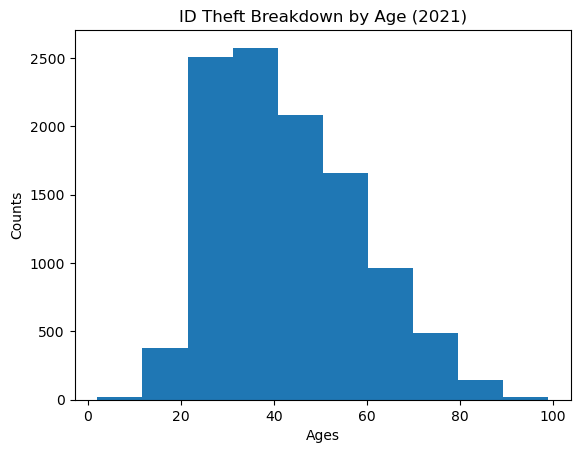

NormaltestResult(statistic=572.3274571441598, pvalue=5.256198528091306e-125)


In [39]:
age2021 = ID_theft_2021['Vict Age']
mean_numpy = np.mean(age2021)
median_numpy = np.median(age2021)
mode_scipy = st.mode(age2021)
print(mean_numpy)
print(median_numpy)
print(mode_scipy)
plt.hist(age2021)
plt.title('ID Theft Breakdown by Age (2021)')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(age2021))

40.301789449221474
37.0
ModeResult(mode=30, count=822)


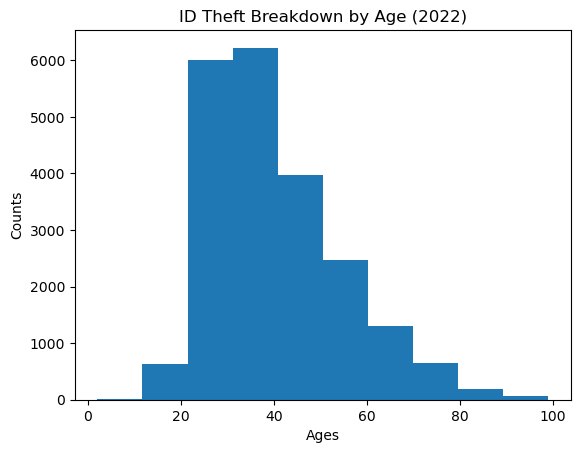

NormaltestResult(statistic=2517.526218697612, pvalue=0.0)


In [40]:
age2022 = ID_theft_2022['Vict Age']
mean_numpy = np.mean(age2022)
median_numpy = np.median(age2022)
mode_scipy = st.mode(age2022)
print(mean_numpy)
print(median_numpy)
print(mode_scipy)
plt.hist(age2022)
plt.title('ID Theft Breakdown by Age (2022)')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(age2022))

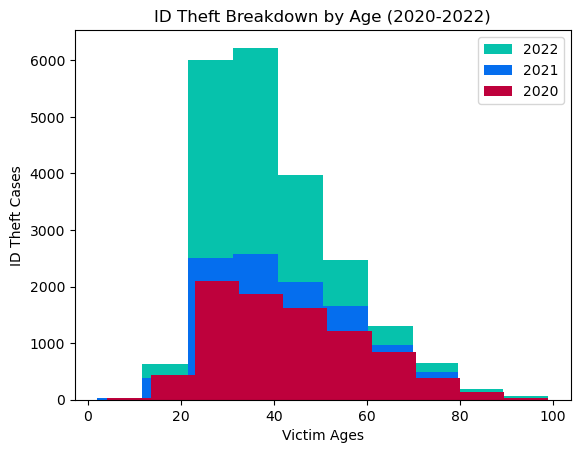

NormaltestResult(statistic=435.9814796796567, pvalue=2.1272796303705668e-95)
NormaltestResult(statistic=572.3274571441598, pvalue=5.256198528091306e-125)
NormaltestResult(statistic=2517.526218697612, pvalue=0.0)


In [50]:
# graph all three years onto one histogram
age2020 = ID_theft_2020['Vict Age']
mean_numpy = np.mean(age2020)
median_numpy = np.median(age2020)
mode_scipy = st.mode(age2020)

age2021=ID_theft_2021['Vict Age']
mean_numpy = np.mean(age2021)
median_numpy = np.median(age2021)
mode_scipy = st.mode(age2021)

age2022=ID_theft_2022['Vict Age']
mean_numpy = np.mean(age2022)
median_numpy = np.median(age2022)
mode_scipy = st.mode(age2022)

hist3= plt.hist(age2022, stacked=True, color='xkcd:turquoise', label='2022')
hist2 =plt.hist(age2021, stacked=True, color='xkcd:cerulean blue', label= '2021')
hist1 =plt.hist(age2020, stacked=True, color='xkcd:rose red', label= '2020')
plt.title('ID Theft Breakdown by Age (2020-2022)')
plt.xlabel('Victim Ages')
plt.ylabel('ID Theft Cases')
plt.legend()
plt.savefig(path.join('Output', 'ID Theft Age Histogram 2020-2022'))
plt.show()
print(st.normaltest(age2020))
print(st.normaltest(age2021))
print(st.normaltest(age2022))

# ID Theft by Area per Year
***

In [41]:
# create data for ID theft by Area from 2020-2022

by_area_2020 = ID_theft_2020.groupby('AREA NAME', as_index=False)
by_area_2020 = by_area_2020[['AREA NAME']].value_counts()
by_area_2020 = by_area_2020.sort_values('count', ascending=False)
by_area_2020.head()
by_area_2020_x = by_area_2020['AREA NAME'].sort_values(ascending=True)
by_area_2020_count = by_area_2020.sort_values('AREA NAME', ascending=False)
by_area_2020_y = by_area_2020_count['count']

by_area_2021 = ID_theft_2021.groupby('AREA NAME', as_index=False)
by_area_2021 = by_area_2021[['AREA NAME']].value_counts()
by_area_2021 = by_area_2021.sort_values('count', ascending=False)
by_area_2021.head()
by_area_2021_x = by_area_2021['AREA NAME'].sort_values(ascending=True)
by_area_2021_count = by_area_2021.sort_values('AREA NAME', ascending=False)
by_area_2021_y = by_area_2021_count['count']

by_area_2022 = ID_theft_2022.groupby('AREA NAME', as_index=False)
by_area_2022 = by_area_2022[['AREA NAME']].value_counts()
by_area_2022 = by_area_2022.sort_values('count', ascending=False)
by_area_2022.head()
by_area_2022_x = by_area_2022['AREA NAME'].sort_values(ascending=True)
by_area_2022_count = by_area_2022.sort_values('AREA NAME', ascending=False)
by_area_2022_y = by_area_2022_count['count']

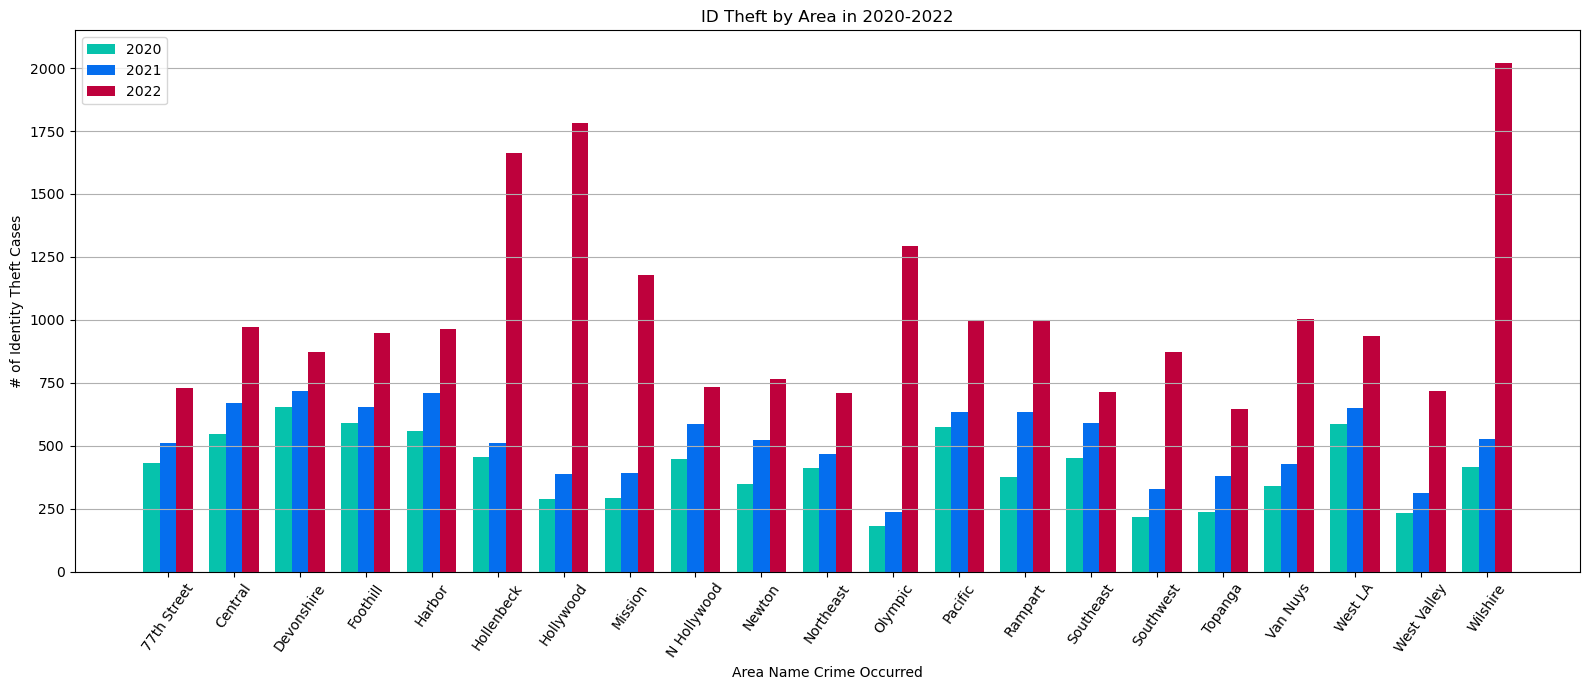

In [53]:
# create a bar graph to compare ID theft by year and area occurred

plt.figure(figsize = (16,7))
x_axis = np.arange(len(by_area_2020_x))
plt.bar(x_axis - 0.25, by_area_2020_y, 0.25, color="xkcd:turquoise", label="2020")
bar1 = plt.bar(x_axis, by_area_2021_y, 0.25, color="xkcd:cerulean blue", label="2021")
bar2 = plt.bar(x_axis + 0.25, by_area_2022_y, 0.25, color="xkcd:rose red", label="2022")
bar3 = plt.grid(axis='y')
plt.xticks(x_axis, by_area_2020_x ,rotation=55)
plt.ylim(0,2150)
plt.title("ID Theft by Area in 2020-2022")
plt.xlabel("Area Name Crime Occurred")
plt.ylabel("# of Identity Theft Cases")
plt.legend()
plt.tight_layout()
plt.savefig(path.join("Output", "ID Theft Yearly By Area - Bar Graph"))
plt.show()